<a href="https://colab.research.google.com/github/SK-0911/Stastical-Analysis-on-Dogecoin-Data/blob/main/CS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()


Saving doge.csv to doge (1).csv


### Installing missing packages

In [ ]:
pip install factor_analyzer

# Imports


In [ ]:
import numpy as np
import pandas as pd
import seaborn    #For data visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot     #For time series
import seaborn as sns
import scipy.cluster.hierarchy as sch     #For Hierarchical cluster analysis
from pandas import Series
from yellowbrick.regressor import ResidualsPlot
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
%matplotlib inline    

In [ ]:
ds = pd.read_csv('doge.csv')  #ds is dataset

In [ ]:
ds.head()   #Shows first 5 rows of the dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0


In [ ]:
ds.tail()   #Shows last 5 rows of the dataset

,Date,Open,High,Low,Close,Adj Close,Volume
2557,2021-09-17,0.242098,0.259535,0.238026,0.239930,0.239930,2.246768e+09
2558,2021-09-18,0.239928,0.247328,0.238228,0.241386,0.241386,9.991515e+08
2559,2021-09-19,0.241281,0.241285,0.231337,0.233142,0.233142,8.927640e+08
2560,2021-09-20,0.233161,0.233606,0.200022,0.207071,0.207071,2.244004e+09
2561,2021-09-21,0.208235,0.217508,0.199987,0.206951,0.206951,1.567924e+09


# Information about the dataset


In [ ]:
print(f'Dimension of Dataframe {ds.shape}') #rows = 2562, columns = 7

Dimension of Dataframe (2562, 7)


In [ ]:
ds.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2.558000e+03
mean,0.022053,0.023778,0.020379,0.022137,0.022137,5.377136e+08
std,0.075989,0.082882,0.069197,0.076145,0.076145,2.939793e+09
min,0.000087,0.000089,0.000085,0.000087,0.000087,1.669500e+04
25%,0.000227,0.000232,0.000223,0.000227,0.000227,2.545335e+05
50%,0.002173,0.002239,0.002088,0.002172,0.002172,1.180531e+07
75%,0.003222,0.003325,0.003110,0.003226,0.003226,6.673909e+07
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2562 non-null   object 
 1   Open       2558 non-null   float64
 2   High       2558 non-null   float64
 3   Low        2558 non-null   float64
 4   Close      2558 non-null   float64
 5   Adj Close  2558 non-null   float64
 6   Volume     2558 non-null   float64
dtypes: float64(6), object(1)
memory usage: 140.2+ KB


Check for null values

In [ ]:
ds.isnull().values.any()

True

That means we do have null values in our dataset

In [ ]:
ds.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [ ]:
ds=ds.dropna()  #Dropping NA values

In [ ]:
ds.isnull().values.any()

False

NA values dropped successfully

In [ ]:
ds.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2558 entries, 0 to 2561
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2558 non-null   object 
 1   Open       2558 non-null   float64
 2   High       2558 non-null   float64
 3   Low        2558 non-null   float64
 4   Close      2558 non-null   float64
 5   Adj Close  2558 non-null   float64
 6   Volume     2558 non-null   float64
dtypes: float64(6), object(1)
memory usage: 159.9+ KB


In [ ]:
np.mean(ds)

Open         2.205291e-02
High         2.377835e-02
Low          2.037870e-02
Close        2.213673e-02
Adj Close    2.213673e-02
Volume       5.377136e+08
dtype: float64

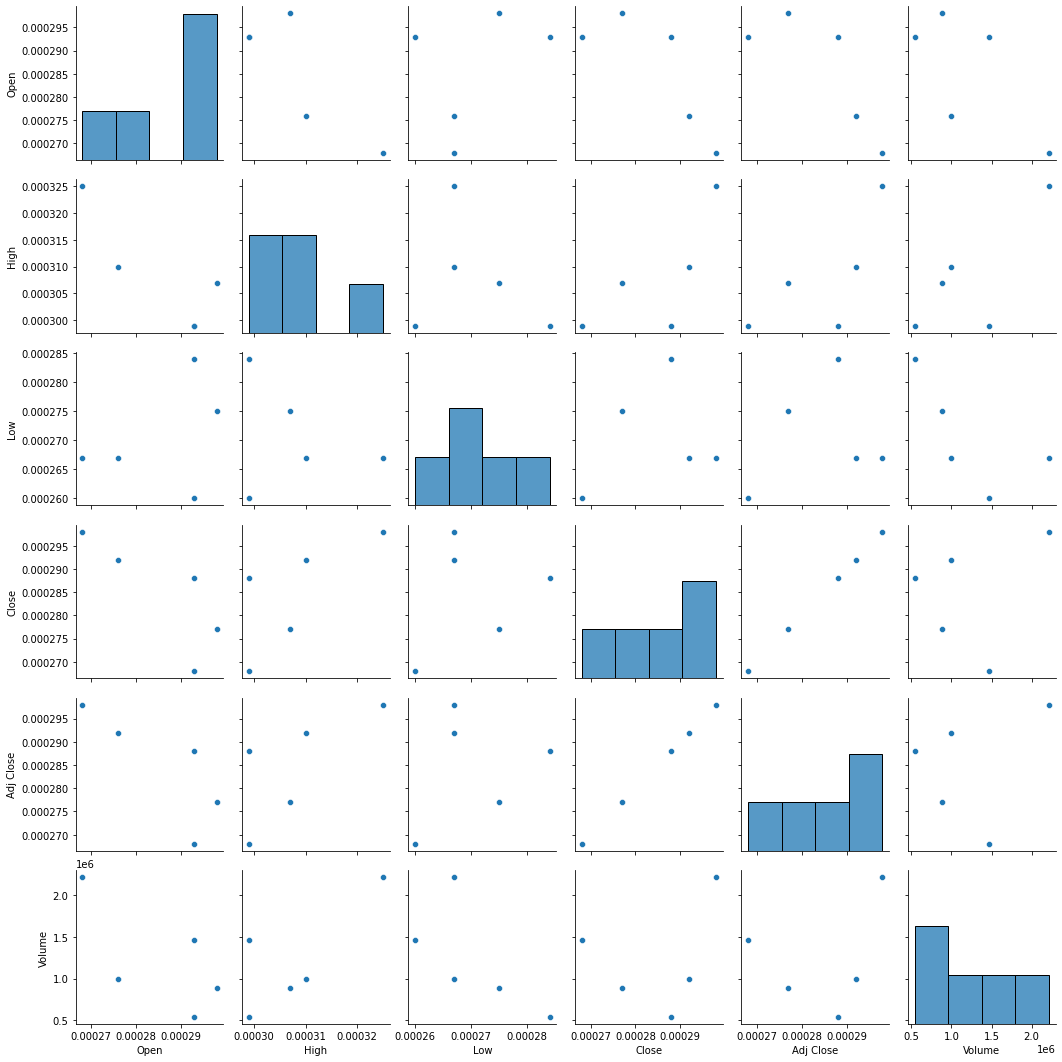

In [ ]:
sns.pairplot(ds.head())

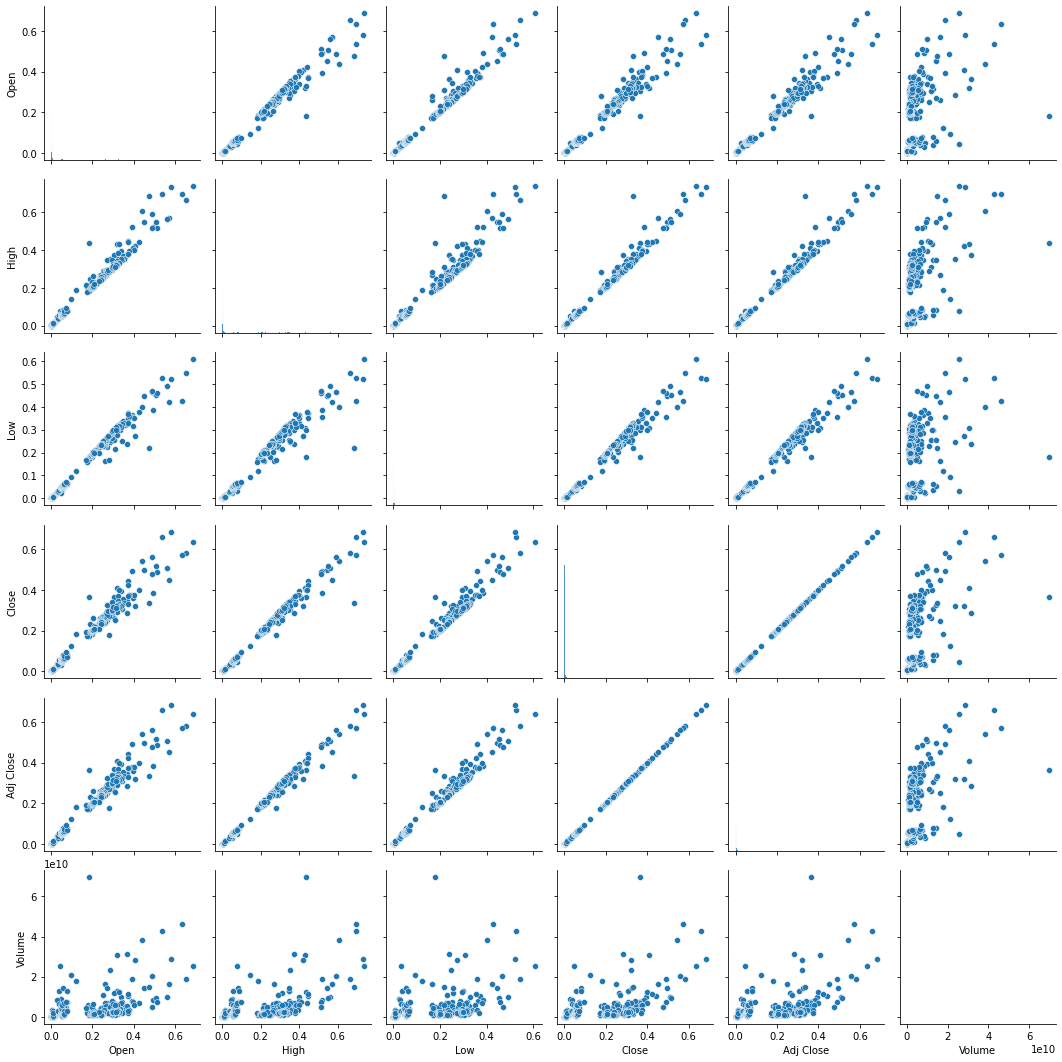

In [ ]:
sns.pairplot(data=ds)

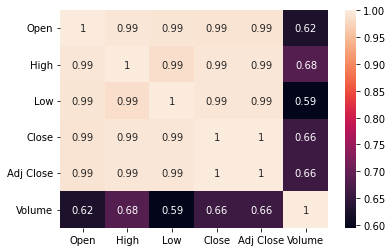

In [ ]:
corr= ds.corr()
sns.heatmap(corr,annot=True)

### Here we see variables where correlation is very high i.e. 99%

### Hence we can see the prescence of multicollinearity

# Simple Regression

In [ ]:
X = np.array(ds['Adj Close'])
X

array([0.000268, 0.000298, 0.000277, ..., 0.233142, 0.207071, 0.206951])

In [ ]:
y = np.array(ds['Adj Close'])
y

array([0.000268, 0.000298, 0.000277, ..., 0.233142, 0.207071, 0.206951])

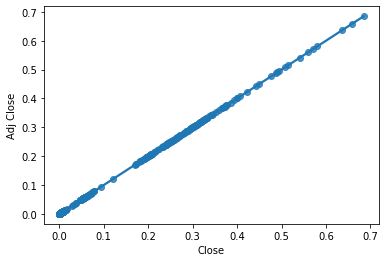

In [ ]:
sns.regplot(data = ds, x= 'Close',y= 'Adj Close')

## Split data


We use the *train_test_split* method from *scikit-learn* to split our data. The test_size is used to tell it what percentage of the data to use for our testing data set and the random_state is used as a seed for the random splitting of the data. The seed will randomize the split in the same way each time for reproducability.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [ ]:
print(f'shape of X_train : {X_train.shape}\nshape of X_test : {X_test.shape}\nshape of y_train : {y_train.shape}\nshape of y_test : {y_test.shape}')

shape of X_train : (2046,)
shape of X_test : (512,)
shape of y_train : (2046,)
shape of y_test : (512,)


In [ ]:
lin_reg = LinearRegression()
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [[1.]]
Intercept:  [-1.73472348e-17]


In [ ]:
X_test = X_test.reshape(-1,1)
y_pred = lin_reg.predict(X_test)

#y_pred

In [ ]:
print("MAE : ",mean_absolute_error(y_test, y_pred))   # MAE = Avg of (True values – Predicted values)

MAE :  2.3795008372945415e-17


In [ ]:
print("MSE : ",mean_squared_error(y_test,y_pred))

MSE :  2.2205258010509348e-33


In [ ]:
print("Coefficient of Determination(R-squared value): ",r2_score(y_test,y_pred))

Coefficient of Determination(R-squared value):  1.0


# Multiple Regression


In [ ]:
#Preprocessing Data
ds=ds.drop(["Date"],axis=1)
scaler = StandardScaler()     #Standardize features by removing the mean and scaling to unit variance
scaler.fit(ds.drop(['Volume'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if **with_mean=False**, and s is the standard deviation of the training samples or one if **with_std=False**.

In [ ]:
#Pandas's dataframe into a numpy array
X=np.array(scaler.transform(ds.drop(['Volume'],axis=1)))
X

array([[-0.28641202, -0.28334053, -0.29080043, -0.28725303, -0.28725303],
       [-0.28674108, -0.28302678, -0.29069925, -0.28685897, -0.28685897],
       [-0.28634621, -0.28324399, -0.29058361, -0.28713481, -0.28713481],
       ...,
       [ 2.88556192,  2.62479325,  3.04924136,  2.77162367,  2.77162367],
       [ 2.77868345,  2.5321258 ,  2.59660692,  2.4291725 ,  2.4291725 ],
       [ 2.45059814,  2.33786083,  2.59610103,  2.42759626,  2.42759626]])

In [ ]:
y= np.array(ds['Volume'])
y

array([1.46360000e+06, 2.21591000e+06, 8.83563000e+05, ...,
       8.92763953e+08, 2.24400354e+09, 1.56792422e+09])

In [ ]:
#Splitting the dataset into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
#Dimension if the train and test dataset
print(f'shape of X_train : {X_train.shape}\nshape of X_test : {X_test.shape}\nshape of y_train : {y_train.shape}\nshape of y_test : {y_test.shape}')

shape of X_train : (1790, 5)
shape of X_test : (768, 5)
shape of y_train : (1790,)
shape of y_test : (768,)


### 768 is approx. 30% of 2562

In [ ]:
#Creating the model
modelLIN= LinearRegression()
modelLIN.fit(X_train,y_train) #Fitting the model
Y_predLin=modelLIN.predict(X_test)

In [ ]:
print("Coefficients: ", modelLIN.coef_)
print("Intercept: ", modelLIN.intercept_)

Coefficients:  [ 2.17068039e+09  7.46315398e+08 -1.47226317e+10  6.78181795e+09
  6.78181795e+09]
Intercept:  514821222.73681194


In [ ]:
print("MAE : ",mean_absolute_error(y_test,Y_predLin))   # MAE = Avg of (True values – Predicted values)

MAE :  281882080.3356578


Model doesn't seems to be good

In [ ]:
print("MSE : ",mean_squared_error(y_test,Y_predLin))

MSE :  2.5455270332513213e+18


Only 73.6% of the variance in **Y** is explaines by the variance of **X**

MSE is calculated by taking the average of the square of the difference between the original and predicted values of the data.

Hence, 
MSE = 

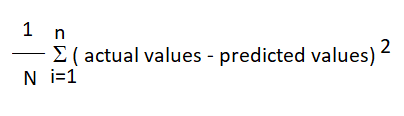

In [ ]:
print("Coefficient of Determination(R-squared value): ",r2_score(y_test,Y_predLin))

Coefficient of Determination(R-squared value):  0.736733829221831


In [ ]:
pd.DataFrame({"Real Prediction":y_test,"Model Prediction":Y_predLin})

,Real Prediction,Model Prediction
0,1.319560e+07,1.251211e+08
1,2.002680e+05,6.468961e+07
2,2.667160e+08,1.926944e+08
3,4.281080e+05,6.421683e+07
4,1.233383e+09,5.375364e+08
...,...,...
763,2.427770e+05,6.463518e+07
764,2.586305e+08,1.224326e+08
765,1.030280e+06,6.820311e+07
766,2.033960e+05,6.461947e+07


# Different types of regression method
## 1. Decision Tree Regression


In [ ]:
modelTree = DecisionTreeRegressor()
modelTree.fit(X_train,y_train)
Y_predTree= modelTree.predict(X_test)

In [ ]:
print("MAE : ",mean_absolute_error(y_test, Y_predTree))
print("MSE : ",mean_squared_error(y_test,Y_predTree))
print("Coefficient of Determination(R squared value): ",r2_score(y_test,Y_predTree))

MAE :  0.0002970128458102525
MSE :  1.826553811028686e-06
Coefficient of Determination(R squared value):  0.9995939681938799


In [ ]:
pd.DataFrame({"Real Prediction":y_test,"Model Prediction":Y_predTree})

,Real Prediction,Model Prediction
0,0.003543,0.003369
1,0.000227,0.000211
2,0.004204,0.004267
3,0.000192,0.000211
4,0.055918,0.056383
...,...,...
507,0.003221,0.003369
508,0.002706,0.002451
509,0.000087,0.000211
510,0.002795,0.002451


## 2. Random forest Regression

In [ ]:
modelEns = RandomForestRegressor()
modelEns.fit(X_train,y_train)
Y_predEns = modelEns.predict(X_test)

In [ ]:
print("MSE : ",mean_absolute_error(y_test, Y_predEns))
print("MAE : ",mean_squared_error(y_test,Y_predEns))
print("Coefficient of Determination(R squared value): ",r2_score(y_test,Y_predEns))

MSE :  0.0002506041395654957
MAE :  1.8320420274746308e-06
Coefficient of Determination(R squared value):  0.9995927481967343


In [ ]:
pd.DataFrame({"Real Prediction":y_test,"Model Prediction":Y_predEns})

,Real Prediction,Model Prediction
0,0.003543,0.003342
1,0.000227,0.000222
2,0.004204,0.004339
3,0.000192,0.000222
4,0.055918,0.055872
...,...,...
507,0.003221,0.003309
508,0.002706,0.002454
509,0.000087,0.000222
510,0.002795,0.002547


# Factor Analysis


### **Kaiser-Meyer-Olkin (KMO)**
This Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [ ]:
kmo_all,kmo_model=calculate_kmo(ds)
print("KMO Value: ", kmo_model)

KMO Value:  0.44321460414509595


### The overall KMO for our data is 0.44, which is means that we cannot perform Factor Analysis on our dataset

# PCA

In [ ]:
covariance_matrix = ds.cov()
covariance_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,5.774328e-03,6.258329e-03,5.222559e-03,5.737574e-03,5.737574e-03,1.396058e+08
High,6.258329e-03,6.869493e-03,5.655391e-03,6.277512e-03,6.277512e-03,1.667488e+08
Low,5.222559e-03,5.655391e-03,4.788279e-03,5.239391e-03,5.239391e-03,1.209854e+08
Close,5.737574e-03,6.277512e-03,5.239391e-03,5.798129e-03,5.798129e-03,1.474768e+08
Adj Close,5.737574e-03,6.277512e-03,5.239391e-03,5.798129e-03,5.798129e-03,1.474768e+08
Volume,1.396058e+08,1.667488e+08,1.209854e+08,1.474768e+08,1.474768e+08,8.642384e+18


In [ ]:
eigenValues, eigenVectors = np.linalg.eig(covariance_matrix)
print(f"Eigen Values: {eigenValues}")
print(f"\nEigen Vectors: {eigenVectors}")

Eigen Values: [ 1.02400000e+03  8.64238424e+18  1.32468760e-02  4.81635067e-05
  1.48071316e-05 -6.64440388e-22]

Eigen Vectors: [[-1.00000000e+00 -1.61536202e-11  6.61651012e-06 -2.51891486e-08
  -1.72131556e-08  2.61382218e-25]
 [ 3.11669889e-22 -1.92941202e-11 -5.22594562e-01  8.42075244e-01
   1.33652095e-01 -9.79150978e-18]
 [ 2.26135738e-22 -1.39990749e-11 -4.81980187e-01 -4.20893270e-01
   7.68362262e-01  1.12237806e-17]
 [ 2.75651325e-22 -1.70643684e-11 -4.97287655e-01 -2.38493332e-01
  -4.42581377e-01 -7.07106781e-01]
 [ 2.75651325e-22 -1.70643684e-11 -4.97287655e-01 -2.38493332e-01
  -4.42581377e-01  7.07106781e-01]
 [ 1.61536202e-11 -1.00000000e+00  3.38020990e-11 -2.21565129e-12
   1.76969088e-12  3.15461085e-27]]


In [ ]:
total_sum = sum(eigenValues)
variablesExplained = [(i/total_sum) for i in sorted(eigenValues, reverse = True)]
variablesExplained

[0.9999999999999999,
 1.184858218791592e-16,
 1.5327802648775163e-21,
 5.572942066594402e-24,
 1.713315583885163e-24,
 -7.688160693699263e-41]

### The first variable explains 99.99% from the total dataset

# Hierarchical Clustering

In [ ]:
ds = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=1.6, random_state=50)

In [ ]:
ds
points = ds[0]

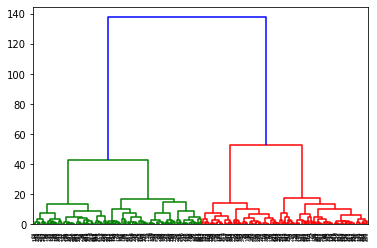

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

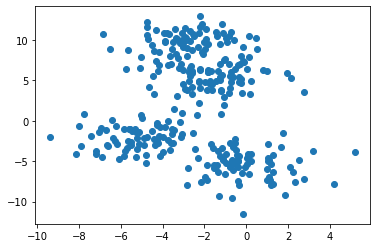

In [ ]:
plt.scatter(ds[0][:,0], ds[0][:,1])

In [ ]:
#Performing the actual clustering
hc = AgglomerativeClustering(n_clusters=4, affinity= 'euclidean', linkage= 'ward')

In [ ]:
y_hc = hc.fit_predict(points)

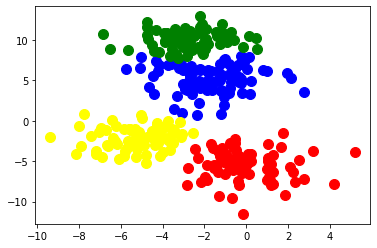

In [ ]:
plt.scatter(points[y_hc==0,0], points[y_hc==0,1], s= 100, c='red')    #Cluster 1
plt.scatter(points[y_hc==1,0], points[y_hc==1,1], s= 100, c='blue')   #Cluster 2
plt.scatter(points[y_hc==2,0], points[y_hc==2,1], s= 100, c='yellow')    #Cluster 3
plt.scatter(points[y_hc==3,0], points[y_hc==3,1], s= 100, c='green')    #Cluster 4

## 4 Clusters are made here